In [1]:
import pandas as pd

data = pd.read_csv('drive/My Drive/FGA/Nutrition Facts for McD Menu/menu.csv')
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

**a) How many calories does the average McDonald's value meal contain?**

In [3]:
# short answer
data['Calories'][0:110].mean() # meal in first 110 rows

462.09090909090907

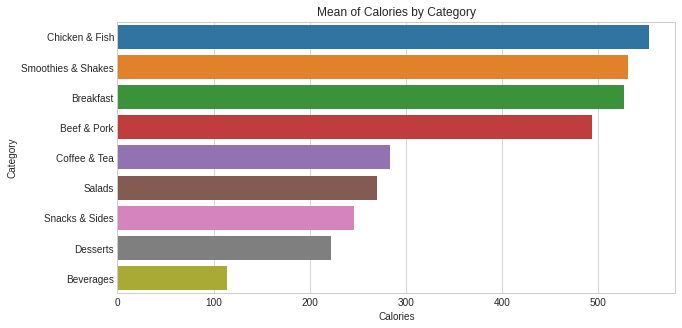

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x='Calories', y='Category', data=data.groupby('Category').mean().reset_index().sort_values('Calories', ascending=False), ax=ax)
ax.set_title('Mean of Calories by Category')
plt.show()

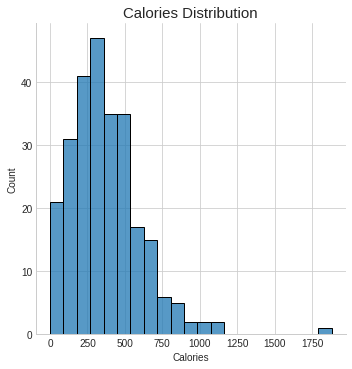

In [6]:
sns.displot(data['Calories'])

plt.title('Calories Distribution', fontsize=15)
plt.show()

In [7]:
data[data['Calories'] > 1500]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,265,89,3600,150,118,39,6,24,1,87,0,15,8,25


In [8]:
data.iloc[79:83]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
79,Chicken & Fish,Chicken McNuggets (6 piece),3.4 oz (97 g),280,160,18.0,27,3.0,15,0.0,40,13,540,22,18,6,1,4,0,13,0,2,2,4
80,Chicken & Fish,Chicken McNuggets (10 piece),5.7 oz (162 g),470,270,30.0,45,5.0,25,0.0,65,22,900,37,30,10,2,6,0,22,0,4,2,6
81,Chicken & Fish,Chicken McNuggets (20 piece),11.4 oz (323 g),940,530,59.0,91,10.0,50,0.0,135,44,1800,75,59,20,3,12,0,44,0,8,4,10
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,265,89,3600,150,118,39,6,24,1,87,0,15,8,25


**b) How much do beverages, like soda or coffee, contribute to the overall caloric intake?**

Generally, the recommended daily calorie intake is 2,000 calories a day for women and 2,500 for men. 

---
source: https://www.nhs.uk/common-health-questions/food-and-diet/what-should-my-daily-intake-of-calories-be/

In [9]:
data_bev = data.iloc[110:]

In [10]:
data_bev[['Category', 'Item', 'Calories']].head()

,Category,Item,Calories
110,Beverages,Coca-Cola Classic (Small),140
111,Beverages,Coca-Cola Classic (Medium),200
112,Beverages,Coca-Cola Classic (Large),280
113,Beverages,Coca-Cola Classic (Child),100
114,Beverages,Diet Coke (Small),0


In [11]:
data_bev['% Daily Men Calories'] = data_bev['Calories']/2500 * 100
data_bev['% Daily Women Calories'] = data_bev['Calories']/2000 * 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


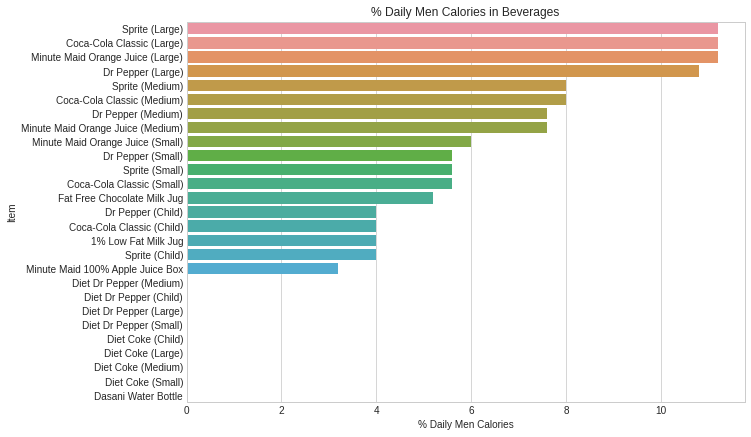

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.barplot(x='% Daily Men Calories', y='Item', data=data_bev[data_bev['Category'] == 'Beverages'].sort_values('% Daily Men Calories', ascending=False).reset_index(), orient='h', ax=ax)
ax.set_title('% Daily Men Calories in Beverages')
plt.show()

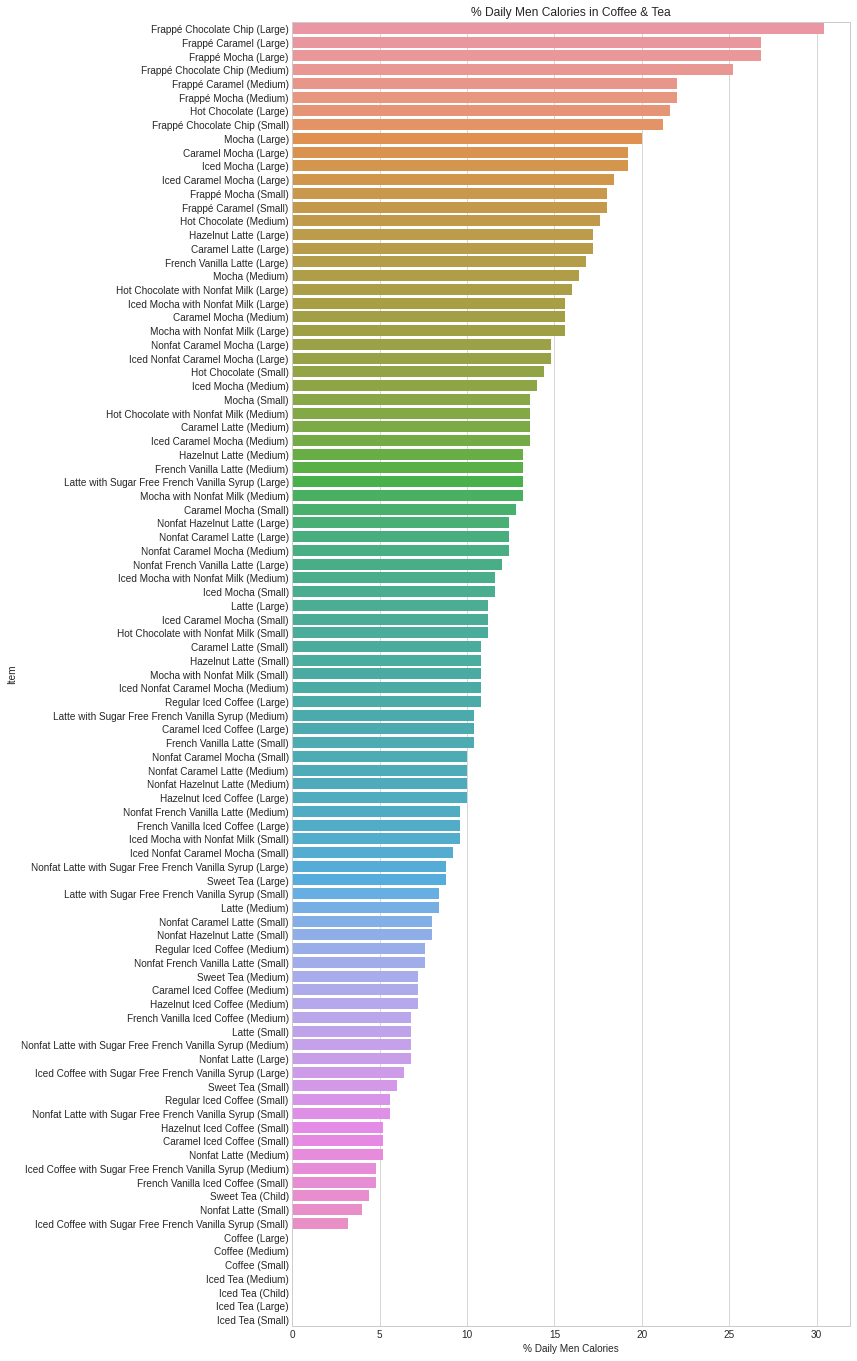

In [13]:
fig, ax = plt.subplots(figsize=(10, 24))

sns.barplot(x='% Daily Men Calories', y='Item', data=data_bev[data_bev['Category'] == 'Coffee & Tea'].sort_values('% Daily Men Calories', ascending=False).reset_index(), orient='h', ax=ax)
ax.set_title('% Daily Men Calories in Coffee & Tea')
plt.show()

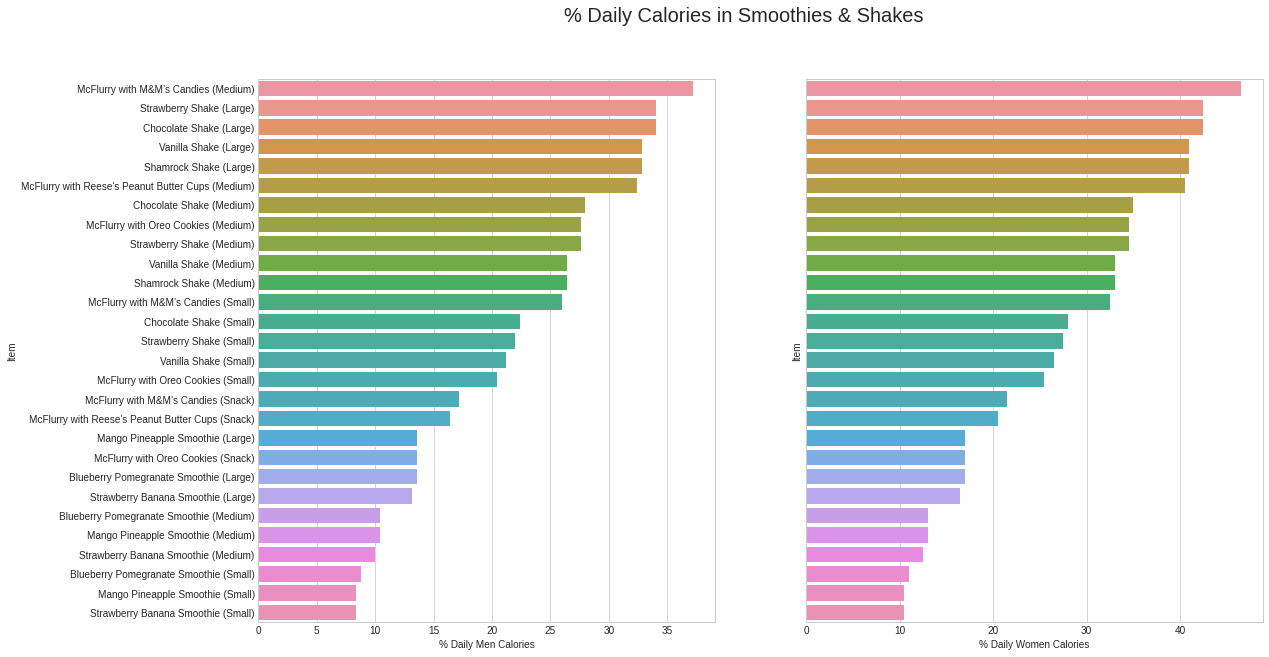

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

sns.barplot(x='% Daily Men Calories', y='Item', data=data_bev[data_bev['Category'] == 'Smoothies & Shakes'].sort_values('Calories', ascending=False).reset_index(), orient='h', ax=ax[0])
sns.barplot(x='% Daily Women Calories', y='Item', data=data_bev[data_bev['Category'] == 'Smoothies & Shakes'].sort_values('Calories', ascending=False).reset_index(), orient='h', ax=ax[1])
fig.suptitle('% Daily Calories in Smoothies & Shakes', fontsize=20)
plt.show()

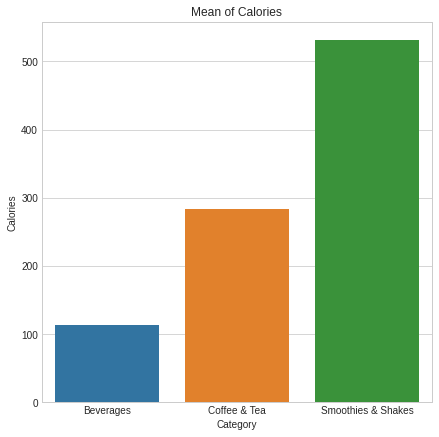

In [15]:
fig, ax = plt.subplots(figsize=(7,7))

sns.barplot(x='Category', y='Calories', data=data_bev.groupby('Category').mean().reset_index(), ax=ax)
ax.set_title('Mean of Calories')
plt.show()

In [16]:
data_bev[['Category', 'Calories', 'Calories from Fat', '% Daily Men Calories', '% Daily Women Calories']].groupby('Category').mean()

,Calories,Calories from Fat,% Daily Men Calories,% Daily Women Calories
Category,,,,
Beverages,113.703704,0.740741,4.548148,5.685185
Coffee & Tea,283.894737,71.105263,11.355789,14.194737
Smoothies & Shakes,531.428571,127.678571,21.257143,26.571429


In average,

*   Beverages contribute 4.6% of daily men calories and 5.7% for women
*   Coffee & Tea contribute 11.4% of daily men calories and 14.2% for women
*   Smoothies & Shakes contribute 21.3% of daily men calories and 26.6% for women





**c) Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?**

The seven major classes of human nutrients are **carbohydrates**, **fats**, **fiber**, **minerals**, **proteins**, **vitamins**, and **water**.

---

source: https://en.wikipedia.org/wiki/Nutrition

In [17]:
daily_need = ['Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)',
              'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)',
              'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

data_sandwich = data.iloc[57:66].loc[:,['Item'] + daily_need]
data_sandwich

,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
57,Premium Crispy Chicken Classic Sandwich,33,18,16,41,18,13,4,6,15,20
58,Premium Grilled Chicken Classic Sandwich,13,9,22,34,14,13,4,8,15,20
59,Premium Crispy Chicken Club Sandwich,51,44,29,59,19,14,8,20,30,20
60,Premium Grilled Chicken Club Sandwich,31,36,35,52,15,13,8,20,30,20
61,Premium Crispy Chicken Ranch BLT Sandwich,43,31,24,58,19,13,4,20,15,20
62,Premium Grilled Chicken Ranch BLT Sandwich,23,22,30,51,14,13,4,20,15,20
63,Bacon Clubhouse Crispy Chicken Sandwich,59,51,31,72,22,15,8,25,30,15
64,Bacon Clubhouse Grilled Chicken Sandwich,39,42,37,65,17,15,8,30,30,15
65,Southern Style Crispy Chicken Sandwich,29,15,14,38,14,7,4,2,15,15


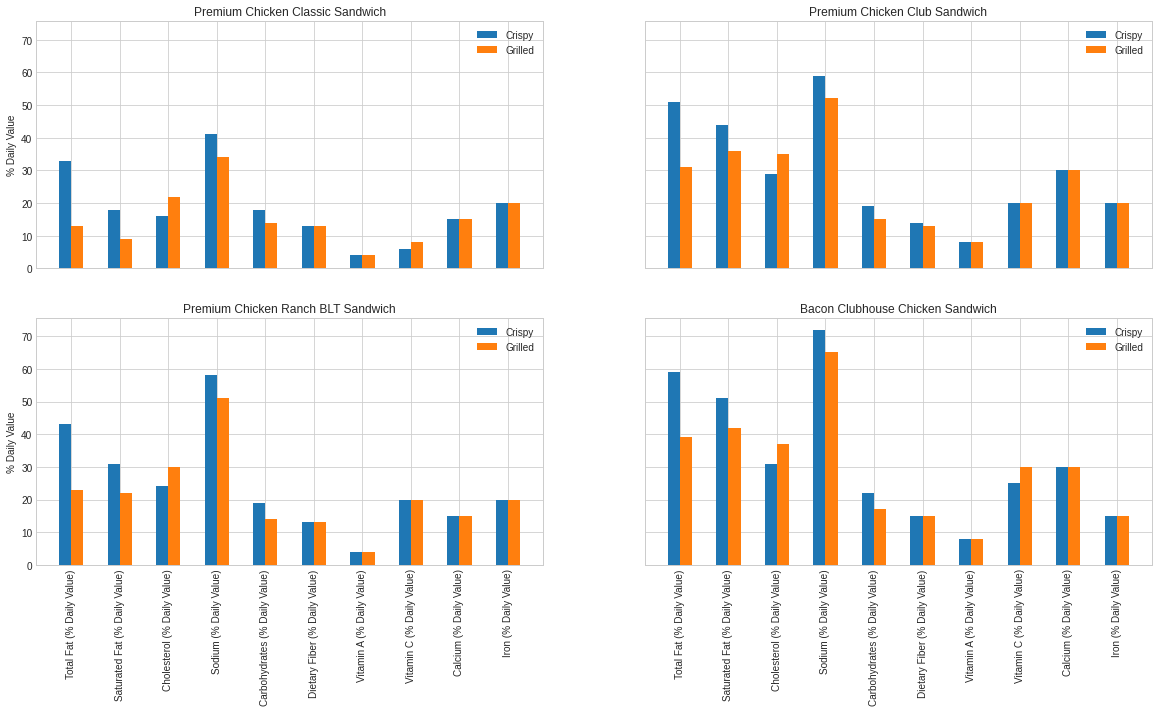

In [18]:
import numpy as np

fig, ax = plt.subplots(2,2, figsize=(20,10), sharex=True, sharey=True)

x = np.linspace(0,9,10)

ax[0][0].bar(x=x-0.125, height=data_sandwich[daily_need].iloc[0], width=0.25, label='Crispy')
ax[0][0].bar(x=x+0.125, height=data_sandwich[daily_need].iloc[1], width=0.25, label='Grilled')
ax[0][0].set_ylabel('% Daily Value')
ax[0][0].set_title('Premium Chicken Classic Sandwich')
ax[0][0].legend()

ax[0][1].bar(x=x-0.125, height=data_sandwich[daily_need].iloc[2], width=0.25, label='Crispy')
ax[0][1].bar(x=x+0.125, height=data_sandwich[daily_need].iloc[3], width=0.25, label='Grilled')
ax[0][1].set_title('Premium Chicken Club Sandwich')
ax[0][1].legend()

ax[1][0].bar(x=x-0.125, height=data_sandwich[daily_need].iloc[4], width=0.25, label='Crispy')
ax[1][0].bar(x=x+0.125, height=data_sandwich[daily_need].iloc[5], width=0.25, label='Grilled')
ax[1][0].set_xticks(x)
ax[1][0].set_xticklabels(daily_need, rotation=90)
ax[1][0].set_ylabel('% Daily Value')
ax[1][0].set_title('Premium Chicken Ranch BLT Sandwich')
ax[1][0].legend()

ax[1][1].bar(x=x-0.125, height=data_sandwich[daily_need].iloc[6], width=0.25, label='Crispy')
ax[1][1].bar(x=x+0.125, height=data_sandwich[daily_need].iloc[7], width=0.25, label='Grilled')
ax[1][1].set_xticks(x)
ax[1][1].set_xticklabels(daily_need, rotation=90)
ax[1][1].set_title('Bacon Clubhouse Chicken Sandwich')
ax[1][1].legend()

plt.show()

Sangat jelas sandwich crispy memiliki nutrisi lebih banyak daripada grilled. Kecuali di Cholestrol lebih tinggi pada grilled

**d) What about ordering egg whites instead of whole eggs?**

In [19]:
data_white_egg = data[data['Item'].str.contains('Egg White')]

data_egg = data[data['Item'].str.contains('Egg')]
data_egg = data_egg[~data_egg['Item'].str.contains('White')]

In [20]:
data_white_egg[['Item'] + daily_need].reset_index()

,index,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,1,Egg White Delight,12,15,8,32,10,17,6,0,25,8
1,4,Sausage McMuffin with Egg Whites,35,42,16,37,10,17,6,0,25,10
2,8,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",32,56,11,54,12,7,2,8,15,10
3,9,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",38,59,11,59,14,12,6,8,15,15
4,14,Sausage Biscuit with Egg Whites (Regular Biscuit),42,62,11,49,11,6,0,0,8,15
5,15,Sausage Biscuit with Egg Whites (Large Biscuit),49,65,11,54,13,11,4,0,8,15
6,20,"Bacon, Egg & Cheese McGriddles with Egg Whites",24,34,11,52,16,9,2,10,15,10
7,23,"Sausage, Egg & Cheese McGriddles with Egg Whites",40,52,17,55,15,9,2,0,20,10
8,25,"Bacon, Egg & Cheese Bagel with Egg Whites",39,45,20,62,18,12,10,15,20,15
9,29,Big Breakfast with Egg Whites (Regular Biscuit),57,69,12,66,17,12,0,2,10,15


In [21]:
data_egg[['Item'] + daily_need].reset_index()

,index,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,0,Egg McMuffin,20,25,87,31,10,17,10,0,25,15
1,3,Sausage McMuffin with Egg,43,52,95,36,10,17,15,0,30,15
2,5,Steak & Egg McMuffin,36,46,100,40,10,18,15,2,30,20
3,6,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",40,65,83,54,13,7,10,8,15,15
4,7,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",47,68,83,59,14,12,15,8,20,20
5,12,Sausage Biscuit with Egg (Regular Biscuit),50,71,83,49,12,6,6,0,10,20
6,13,Sausage Biscuit with Egg (Large Biscuit),57,74,83,53,14,11,10,0,10,20
7,18,Steak & Egg Biscuit (Regular Biscuit),49,78,93,61,13,8,10,2,20,25
8,19,"Bacon, Egg & Cheese McGriddles",32,44,84,52,16,9,10,10,20,15
9,22,"Sausage, Egg & Cheese McGriddles",48,61,89,55,16,9,10,0,20,15


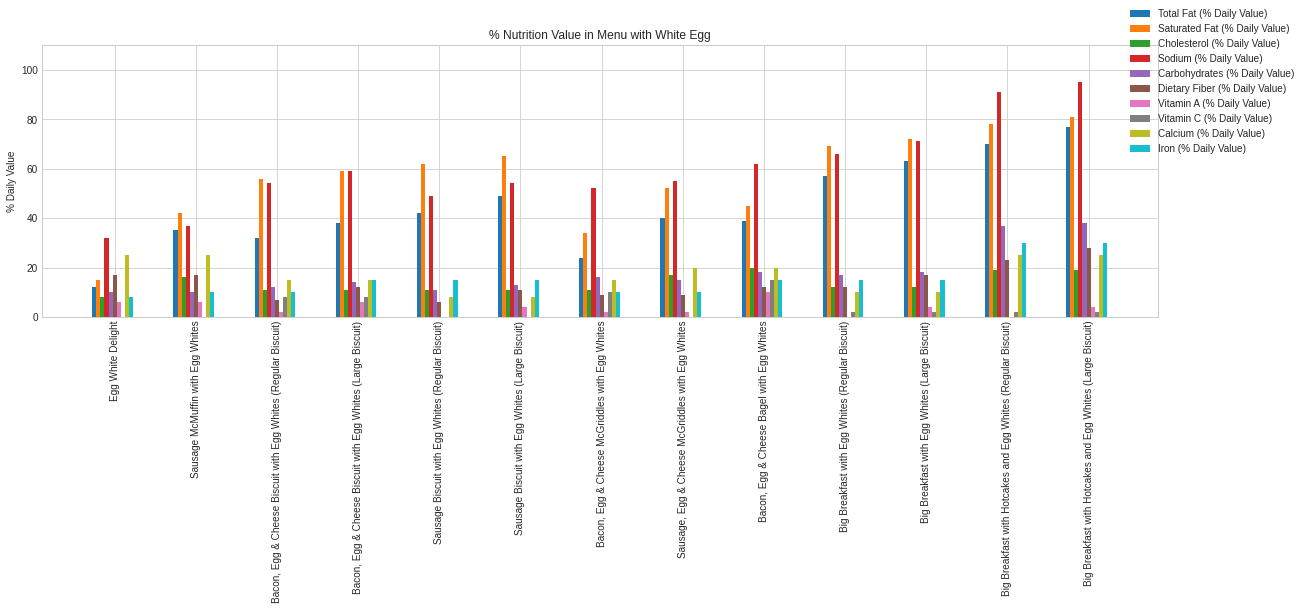

In [22]:
import numpy as np

fig, ax = plt.subplots(figsize=(20,5))
x1 = np.linspace(0,12,13)
width = 0.05

for i in range(10):
  ax.bar(x=x1+(i-5)*width, height=data_white_egg[daily_need[i]], width=width, label=daily_need[i])
ax.set_xticks(x1)
ax.set_xticklabels(data_white_egg['Item'], rotation=90)
ax.set_ylim(top=110)
ax.set_ylabel('% Daily Value')
ax.set_title('% Nutrition Value in Menu with White Egg')

fig.legend()
plt.show()

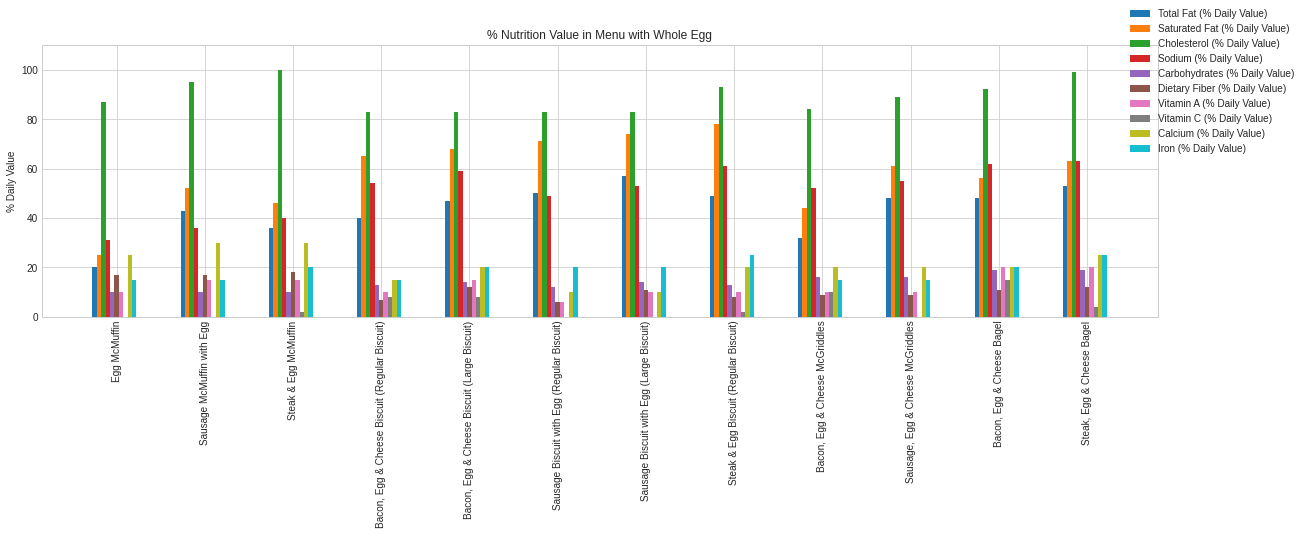

In [23]:
fig, ax = plt.subplots(figsize=(20,5))

width = 0.05

x2 = np.linspace(0,11,12)
for i in range(10):
  ax.bar(x=x2+(i-5)*width, height=data_egg[daily_need[i]], width=width, label=daily_need[i])
ax.set_xticks(x2)
ax.set_xticklabels(data_egg['Item'], rotation=90)
ax.set_ylim(top=110)
ax.set_ylabel('% Daily Value')
ax.set_title('% Nutrition Value in Menu with Whole Egg')

fig.legend()
plt.show()

In [24]:
data_white_egg[daily_need].mean()

Total Fat (% Daily Value)        44.461538
Saturated Fat (% Daily Value)    56.153846
Cholesterol (% Daily Value)      13.692308
Sodium (% Daily Value)           59.769231
Carbohydrates (% Daily Value)    17.615385
Dietary Fiber (% Daily Value)    13.846154
Vitamin A (% Daily Value)         3.538462
Vitamin C (% Daily Value)         3.769231
Calcium (% Daily Value)          17.000000
Iron (% Daily Value)             15.230769
dtype: float64

In [25]:
data_egg[daily_need].mean()

Total Fat (% Daily Value)        43.583333
Saturated Fat (% Daily Value)    58.583333
Cholesterol (% Daily Value)      89.250000
Sodium (% Daily Value)           51.250000
Carbohydrates (% Daily Value)    13.833333
Dietary Fiber (% Daily Value)    11.416667
Vitamin A (% Daily Value)        12.583333
Vitamin C (% Daily Value)         4.083333
Calcium (% Daily Value)          20.416667
Iron (% Daily Value)             18.750000
dtype: float64

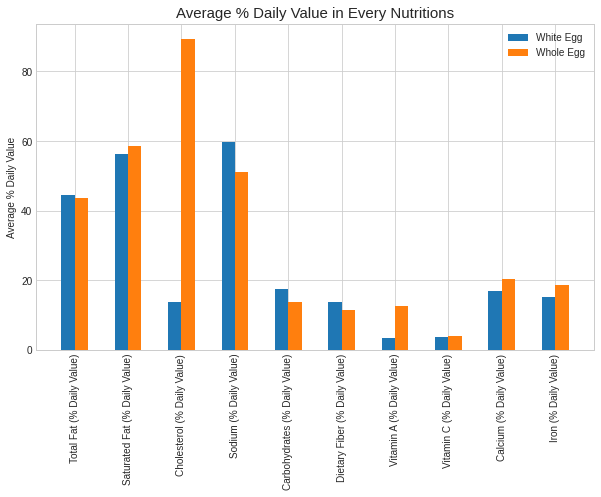

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x=x-0.125, height=data_white_egg[daily_need].mean(), width=0.25, label='White Egg')
ax.bar(x=x+0.125, height=data_egg[daily_need].mean(), width=0.25, label='Whole Egg')
ax.set_xticks(x)
ax.set_xticklabels(daily_need, rotation=90)
ax.set_title('Average % Daily Value in Every Nutritions', fontsize=15)
ax.set_ylabel('Average % Daily Value')
ax.legend()
plt.show()

**e) What is the least number of items could you order from the menu to meet one day's nutritional requirements?**

In [28]:
data.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

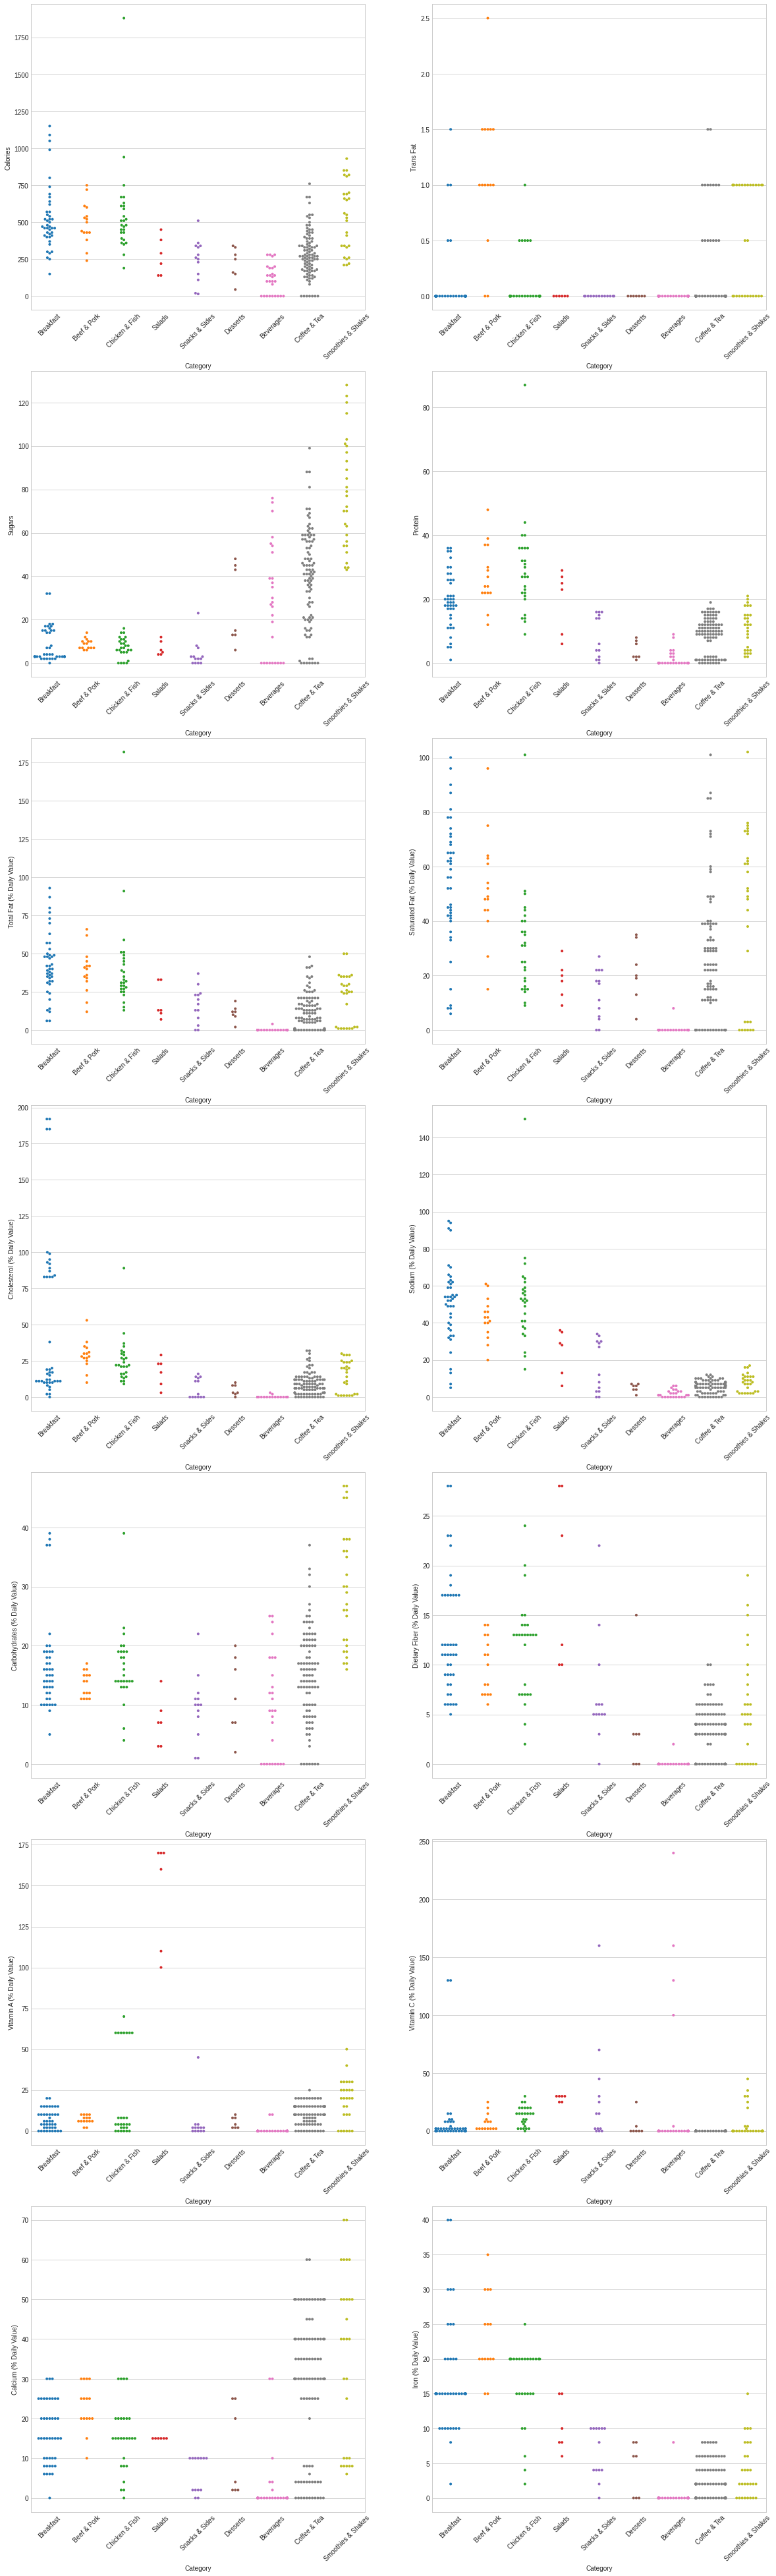

In [29]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(7,2, figsize=(20,70))
nutritions = ['Calories', 'Trans Fat', 'Sugars', 'Protein'] + daily_need

k = 0
for i in range(7):
  for j in range(2):
    if k == 14: break
    sns.swarmplot(x="Category", y=nutritions[k], data=data, size=4, ax=ax[i][j])
    ax[i][j].set_xticks(range(9))
    ax[i][j].set_xticklabels(data['Category'].unique(), rotation=45)
    k += 1

plt.show()